In [10]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

In [13]:
#Train data
train_cat = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TRAIN_CATEGORICAL_METADATA_new.csv")
train_fcm = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
train_Q = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TRAIN_QUANTITATIVE_METADATA_new.csv")
train_sol = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TRAINING_SOLUTIONS.csv")

In [14]:
# Test data
test_cat = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TEST_CATEGORICAL.csv")
test_fcm = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
test_Q = pd.read_csv("C:/Users/DELL/Desktop/Semester10/MachineLearning/Milestone2/TEST_QUANTITATIVE_METADATA.csv")

In [17]:
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [18]:
train_fcm.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [19]:
train_Q.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [20]:
train_sol.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [21]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [22]:
train_fcm.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [23]:
train_Q.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [24]:
train_sol.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [25]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [26]:
#Barratt_Barratt_P2_Occ - Barratt Simplified Measure of Social Status - Parent 2 Occupation
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

Barratt_Barratt_P2_Occ
45.0    239
35.0    195
30.0    149
40.0    116
15.0     86
0.0      65
20.0     41
5.0      38
10.0     37
25.0     25
Name: count, dtype: int64

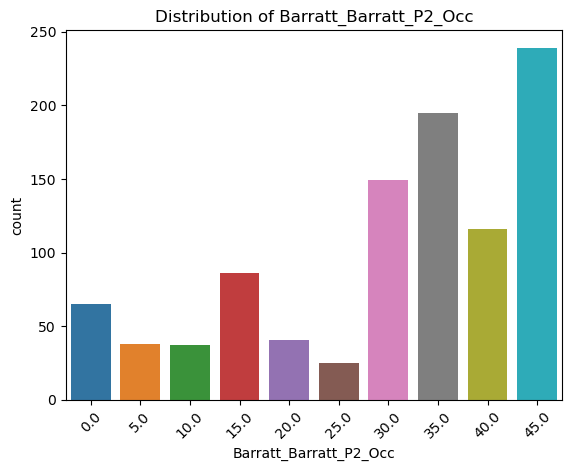

In [27]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

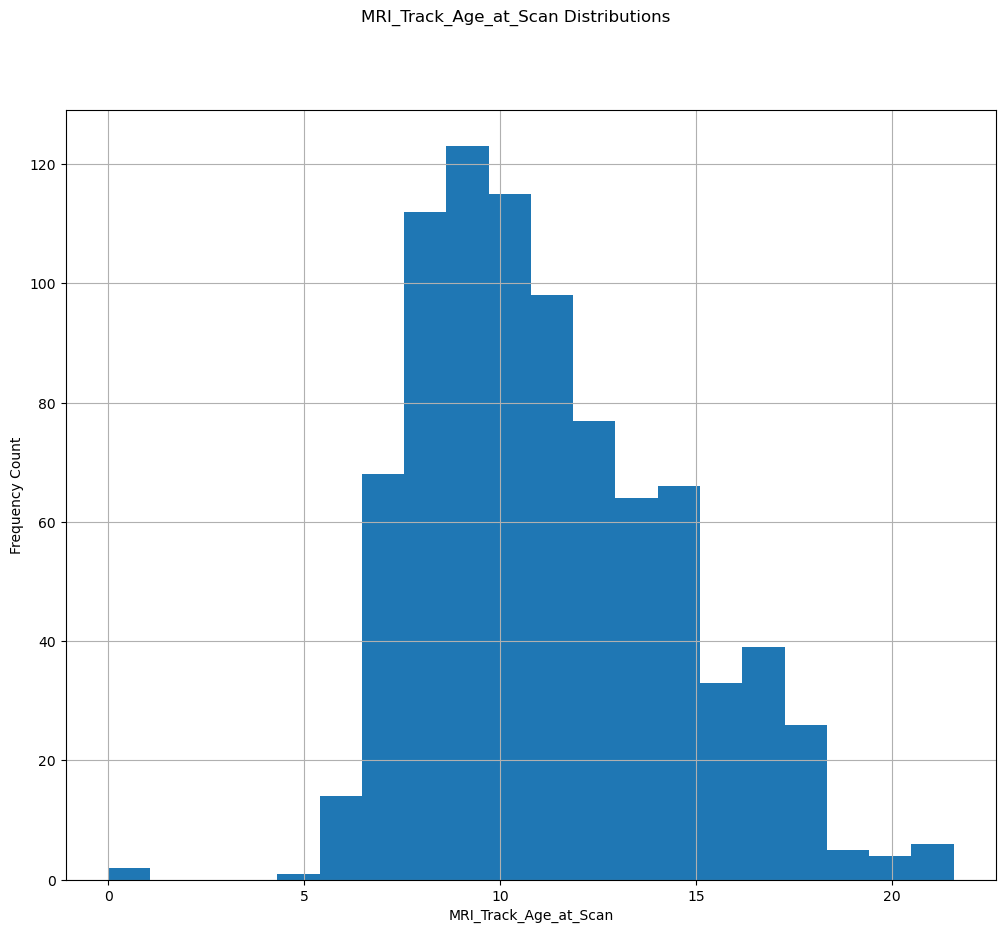

In [29]:
# Distribution of MRI_Track_Age_at_Scan
train_Q['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()


In [31]:
# ADHD distribution
train_sol['ADHD_Outcome'].value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

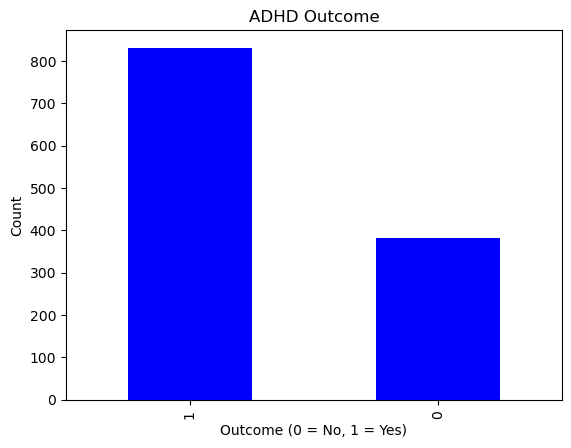

In [33]:
train_sol['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [34]:
# Gender distribution
train_sol['Sex_F'].value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

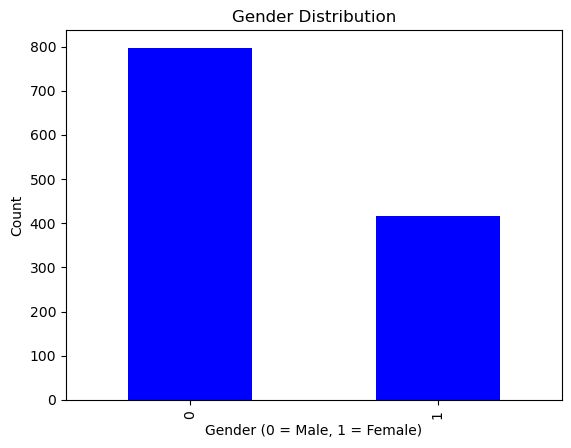

In [35]:
train_sol['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

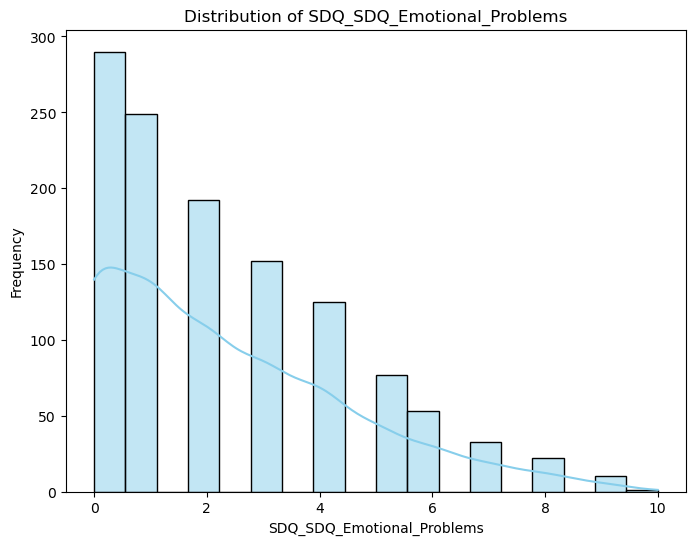

In [37]:
# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(train_Q['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

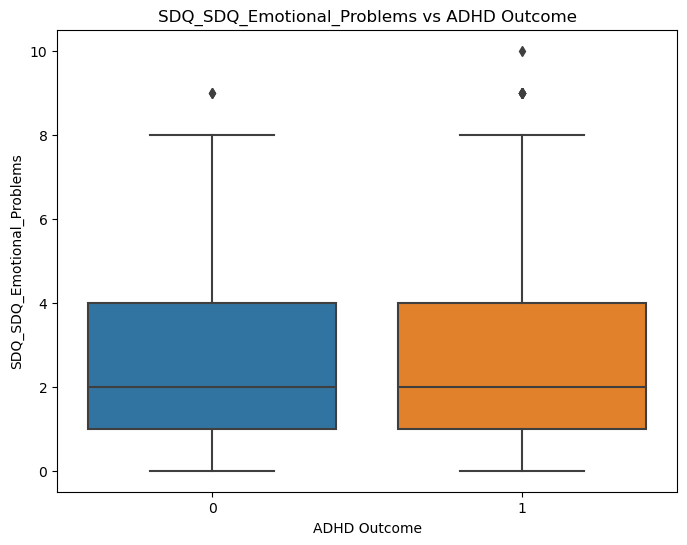

In [38]:
# Check for correlation with ADHD outcome
train_Q_copy = train_Q.copy()
train_Q_copy['ADHD_Outcome'] = train_sol['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_Q_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

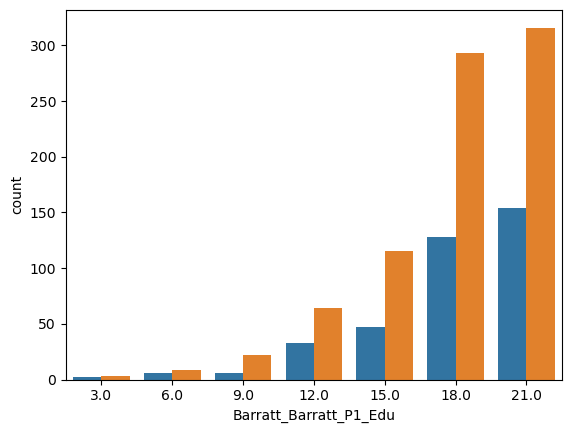

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_cat, x='Barratt_Barratt_P1_Edu', hue=train_sol['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 1 Education')
plt.show()

In [41]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Barratt_Barratt_P1_Edu
21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: count, dtype: int64

In [42]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_sol['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P1_Edu
3.0     0.600000
6.0     0.600000
9.0     0.785714
12.0    0.659794
15.0    0.709877
18.0    0.695962
21.0    0.672340
Name: ADHD_Outcome, dtype: float64


In [44]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Barratt_Barratt_P1_Edu
21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: count, dtype: int64

In [45]:
for col in train_cat.select_dtypes(include='int').columns:
    train_cat[col] = train_cat[col].astype('category')

In [46]:
# Creating a list of all of the columns except the first
columns_to_encode = train_cat.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [47]:
# encoding categorical data
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [48]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4
0,00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,0,1,0,0,0,1
1,00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,0,0,0,0,0,0
2,04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,0,0,0,0,0,0
3,05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,1,0,0,0,0,0
4,06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,1,0,0,0,0,0


In [49]:
# convert our int variables to categories
for col in test_cat.select_dtypes(include='int').columns:
    test_cat[col] = test_cat[col].astype('category')

# Encode categorical variables in test
test_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)
test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Ensure test_encoded has the same columns as train_encoded
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([test_cat.drop(columns=columns_to_encode), test_encoded], axis=1)

cat_test_final.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4
0,Cfwaf5FX7jWK,0.0,0.0,0,21.0,30.0,18.0,30.0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,0.0,0.0,0,21.0,45.0,NaN,30.0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,0.0,0.0,0,21.0,40.0,18.0,40.0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,0.0,0.0,0,21.0,45.0,21.0,45.0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,2.0,0.0,0,18.0,0.0,21.0,45.0,0,0,0,0,0,0,0,0


In [50]:
train_cat_FCM = pd.merge(cat_train_final, train_fcm, on = 'participant_id')

In [51]:
train_df = pd.merge(train_cat_FCM, train_Q, on = 'participant_id')

# ensure it looks accurate
train_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [52]:
test_cat_FCM = pd.merge(cat_test_final, test_fcm, on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_Q, on = 'participant_id')

# ensure it looks accurate
test_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,0.0,0.0,0,21.0,30.0,18.0,30.0,0,0,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,0.0,0.0,0,21.0,45.0,NaN,30.0,0,0,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,0.0,0.0,0,21.0,40.0,18.0,40.0,0,0,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,0.0,0.0,0,21.0,45.0,21.0,45.0,0,0,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,2.0,0.0,0,18.0,0.0,21.0,45.0,0,0,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [53]:
train_df = train_df.set_index('participant_id').sort_index()
train_df.head()

,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
participant_id,,,,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,0,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,0,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,0,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,1,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,1,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [55]:
# check how many NA values we have
print(train_df.isna().sum())

# 371 NANs values
# 360 in MRI_Track_age_at_Scan
# 11 in PreInt_Demos_Fam_Child_Ethnicity

PreInt_Demos_Fam_Child_Ethnicity     43
PreInt_Demos_Fam_Child_Race          54
MRI_Track_Scan_Location               3
Barratt_Barratt_P1_Edu               15
Barratt_Barratt_P1_Occ               31
                                   ... 
SDQ_SDQ_Hyperactivity                 9
SDQ_SDQ_Internalizing                 9
SDQ_SDQ_Peer_Problems                 9
SDQ_SDQ_Prosocial                     9
MRI_Track_Age_at_Scan               360
Length: 19933, dtype: int64


In [56]:
train_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)
train_df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

print(train_df.isna().sum().sum()) # should now be zero

712


In [57]:
train_df.ffill(inplace=True)
print(train_df.isna().sum().sum())

2


In [58]:
# Fill NAs of test data

for col in test_df.columns:
    if test_df[col].isna().sum() > 0:  # Check if the column has NaN values
        if test_df[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            test_df[col] = test_df[col].fillna(test_df[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")

In [60]:
print(train_df.isna().sum())  # This should now be zero


PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
Barratt_Barratt_P1_Occ              0
                                   ..
SDQ_SDQ_Hyperactivity               0
SDQ_SDQ_Internalizing               0
SDQ_SDQ_Peer_Problems               0
SDQ_SDQ_Prosocial                   0
MRI_Track_Age_at_Scan               0
Length: 19933, dtype: int64


In [61]:
print(test_df.isna().sum())  # This should now be zero

participant_id                      0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
                                   ..
SDQ_SDQ_Hyperactivity               0
SDQ_SDQ_Internalizing               0
SDQ_SDQ_Peer_Problems               0
SDQ_SDQ_Prosocial                   0
MRI_Track_Age_at_Scan               0
Length: 19934, dtype: int64


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
import numpy as np

# Step 1: Split the data (70% training, 30% testing)
X = train_df  # Features (assuming train_df contains your features)
y = train_sol[['ADHD_Outcome', 'Sex_F']]  # Replace with actual target column names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Handle missing values (impute with the mean) before scaling
imputer = SimpleImputer(strategy='mean')

# Impute missing values in training data
X_train_imputed = imputer.fit_transform(X_train)

# Impute missing values in test data
X_test_imputed = imputer.transform(X_test)

# Step 3: Apply scaling using StandardScaler
scaler = StandardScaler()

# Scale the imputed training data
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Scale the imputed test data using the same scaler
X_test_scaled = scaler.transform(X_test_imputed)

# Step 4: Feature selection using Logistic Regression
logreg = LogisticRegression()

# Apply MultiOutputClassifier to handle multi-output classification
multi_target_model = MultiOutputClassifier(logreg)

# Train the model using the training data
multi_target_model.fit(X_train_scaled, y_train)

# Step 5: Evaluate the model on the test set
y_pred = multi_target_model.predict(X_test_scaled)

# Calculate accuracy for each target variable
accuracy_1 = accuracy_score(y_test.iloc[:, 0], y_pred[:, 0])  # Accuracy for target_column_1
accuracy_2 = accuracy_score(y_test.iloc[:, 1], y_pred[:, 1])  # Accuracy for target_column_2

# Print the accuracy for both target columns
print(f"Accuracy for target_column_1: {accuracy_1}")
print(f"Accuracy for target_column_2: {accuracy_2}")


Accuracy for target_column_1: 0.5961538461538461
Accuracy for target_column_2: 0.5302197802197802


In [72]:
from sklearn.model_selection import GridSearchCV
# 1. KNN Classifier with Grid Search
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)
best_knn = grid_search_knn.best_estimator_

# Evaluate the performance
y_pred_knn = best_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Best Parameters: {grid_search_knn.best_params_}")
print(f"KNN Accuracy: {accuracy_knn}")


KNN Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
KNN Accuracy: 0.43956043956043955


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 2. Decision Tree Classifier with Optimized Grid Search
dt = DecisionTreeClassifier(random_state=42)

# Limit the parameter grid search space for faster results
param_grid_dt = {
    'max_depth': [None, 10, 20],  # Limit max depth to 10, 20 (reduce complexity)
    'min_samples_split': [2, 5],  # Fewer options to reduce search space
    'min_samples_leaf': [1, 2],   # Fewer options for leaf nodes
}

# Use n_jobs=-1 for parallel computation (use all CPU cores)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best estimator (model with optimal hyperparameters)
best_dt = grid_search_dt.best_estimator_

# Evaluate the performance
y_pred_dt = best_dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Output best parameters and accuracy
print(f"Decision Tree Best Parameters: {grid_search_dt.best_params_}")
print(f"Decision Tree Accuracy: {accuracy_dt}")


Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Accuracy: 0.3159340659340659


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 3. Random Forest Classifier with Optimized Grid Search
rf = RandomForestClassifier(random_state=42, n_jobs=-1)  # Use all CPU cores for parallelization

# Reduce the hyperparameter grid to speed up the search
param_grid_rf = {
    'n_estimators': [50, 100],  # Reduced number of trees
    'max_depth': [None, 10, 20],  # Reduced depth options
    'min_samples_split': [2, 5],  # Fewer options for splitting
    'min_samples_leaf': [1, 2],   # Fewer options for leaf nodes
    'max_features': ['sqrt', 'log2']  # Limit the features considered for each split
}

# Use fewer folds for cross-validation (cv=3 instead of cv=5)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)  # Parallelize grid search
grid_search_rf.fit(X_train_scaled, y_train)

best_rf = grid_search_rf.best_estimator_

# Evaluate the performance
y_pred_rf = best_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the best parameters and accuracy
print(f"Random Forest Best Parameters: {grid_search_rf.best_params_}")
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 0.489010989010989


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score

# 4. Logistic Regression (MultiOutputClassifier) with Correct Grid Search

# Define LogisticRegression and the MultiOutputClassifier
logreg = LogisticRegression(max_iter=1000)

# Define the parameter grid for Logistic Regression (the 'C' and 'solver' parameters)
param_grid_logreg = {
    'estimator__C': [0.1, 1, 10],  # Use 'estimator__' prefix for parameters of LogisticRegression
    'estimator__solver': ['lbfgs']  # Only 'lbfgs' for better speed with multi-output classifier
}

# Wrap Logistic Regression in MultiOutputClassifier
multi_target_model_logreg = MultiOutputClassifier(logreg)

# Perform Grid Search with the updated parameter grid for Logistic Regression
grid_search_logreg = GridSearchCV(multi_target_model_logreg, param_grid_logreg, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train_scaled, y_train)

# Get the best estimator (model with optimal hyperparameters)
best_logreg = grid_search_logreg.best_estimator_

# Evaluate the performance
y_pred_logreg = best_logreg.predict(X_test_scaled)

# Calculate accuracy for each target column
accuracy_logreg_1 = accuracy_score(y_test.iloc[:, 0], y_pred_logreg[:, 0])  # Accuracy for target_column_1
accuracy_logreg_2 = accuracy_score(y_test.iloc[:, 1], y_pred_logreg[:, 1])  # Accuracy for target_column_2

# Output the best parameters and accuracy
print(f"Logistic Regression Best Parameters: {grid_search_logreg.best_params_}")
print(f"Logistic Regression Accuracy for target_column_1: {accuracy_logreg_1}")
print(f"Logistic Regression Accuracy for target_column_2: {accuracy_logreg_2}")

# F1 Score for Logistic Regression
f1_logreg_1 = f1_score(y_test.iloc[:, 0], y_pred_logreg[:, 0], average='weighted')
f1_logreg_2 = f1_score(y_test.iloc[:, 1], y_pred_logreg[:, 1], average='weighted')
print(f"Logistic Regression F1 Score for target_column_1: {f1_logreg_1}")
print(f"Logistic Regression F1 Score for target_column_2: {f1_logreg_2}")


Logistic Regression Best Parameters: {'estimator__C': 1, 'estimator__solver': 'lbfgs'}
Logistic Regression Accuracy for target_column_1: 0.5961538461538461
Logistic Regression Accuracy for target_column_2: 0.5302197802197802
Logistic Regression F1 Score for target_column_1: 0.5807712794686791
Logistic Regression F1 Score for target_column_2: 0.5062928729960043


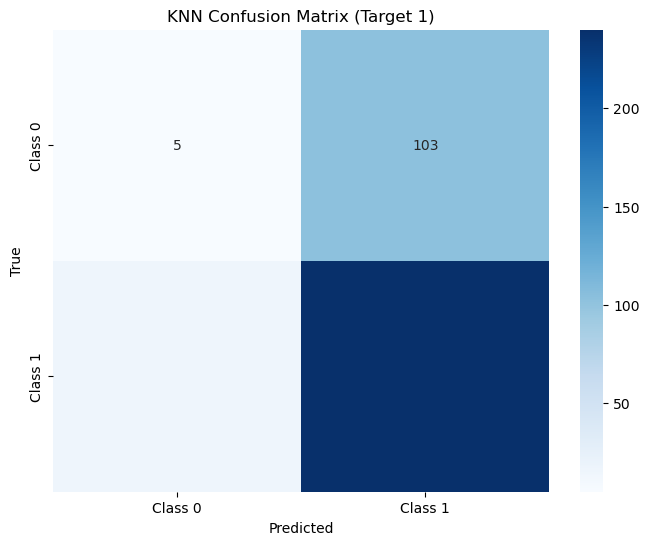

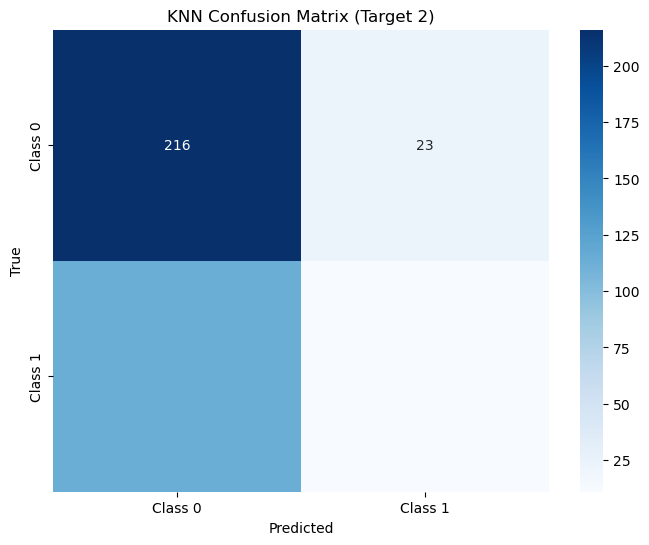

KNN F1 Score for target_column_1: 0.5865769126242006
KNN F1 Score for target_column_2: 0.5460186319190863


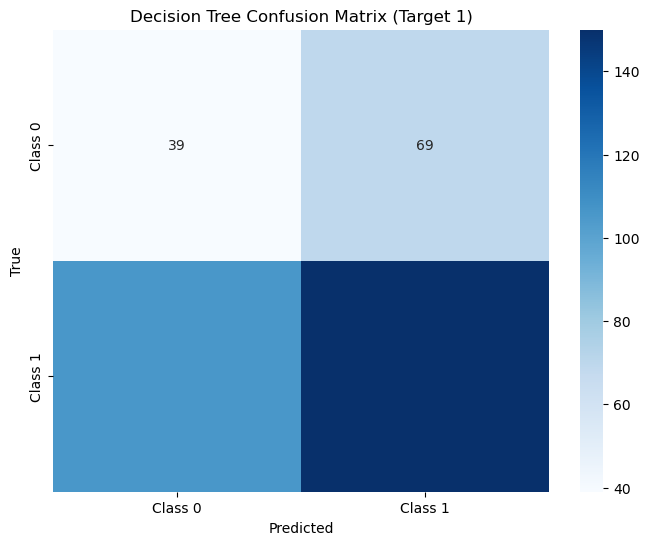

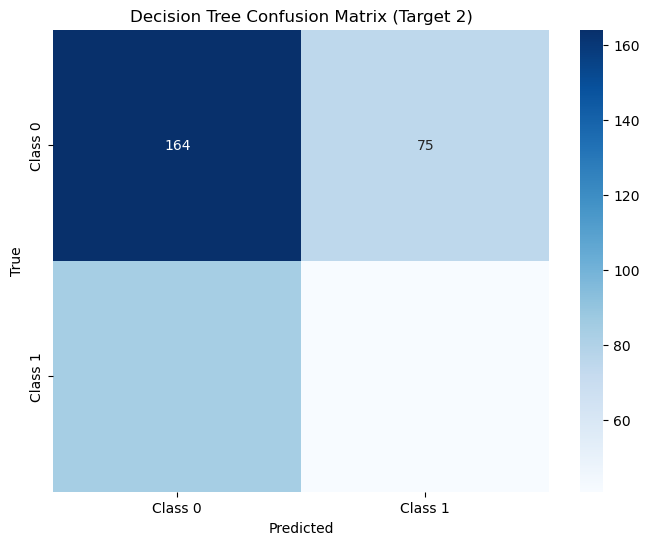

Decision Tree F1 Score for target_column_1: 0.5356611352034693
Decision Tree F1 Score for target_column_2: 0.5590668118422938


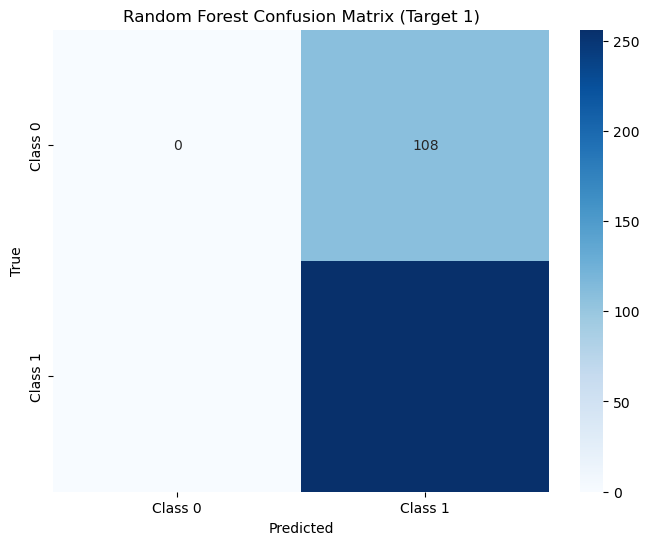

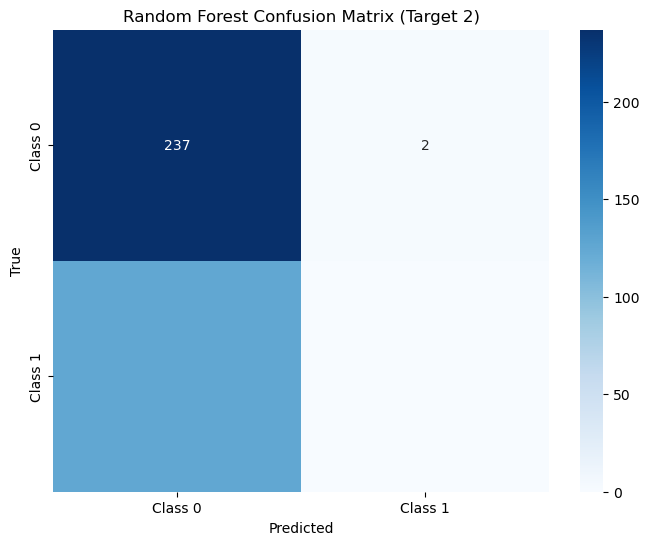

Random Forest F1 Score for target_column_1: 0.5807869549805034
Random Forest F1 Score for target_column_2: 0.5178457150170961


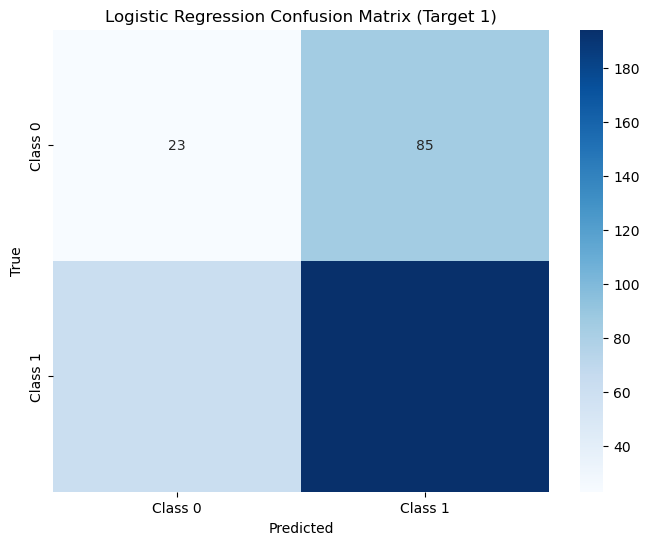

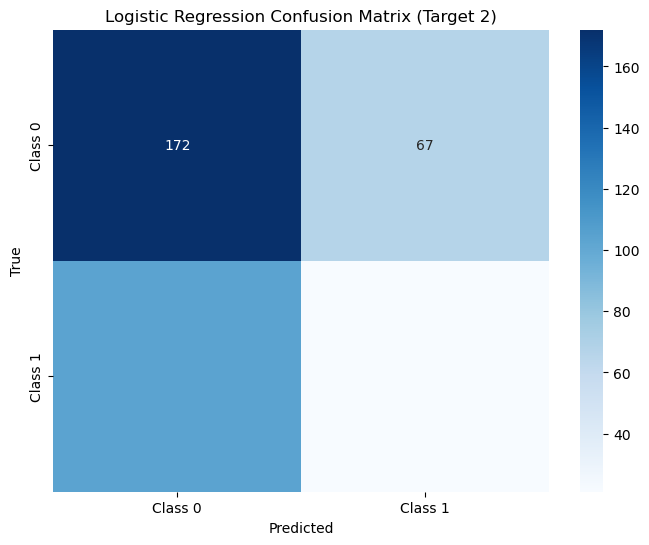

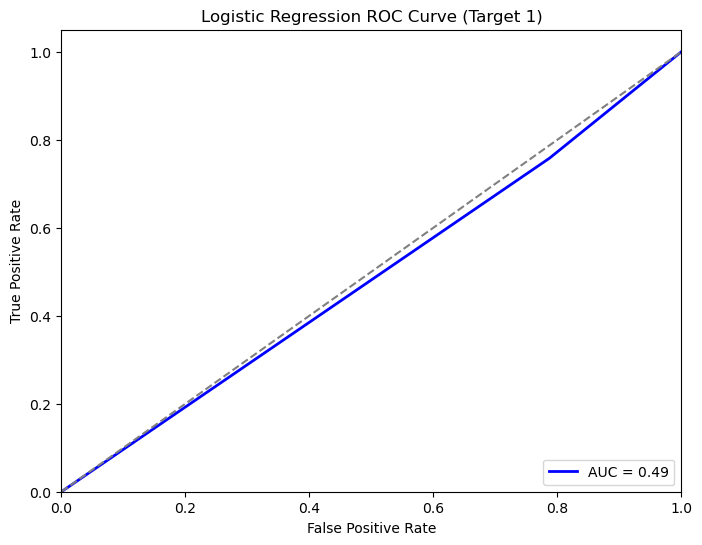

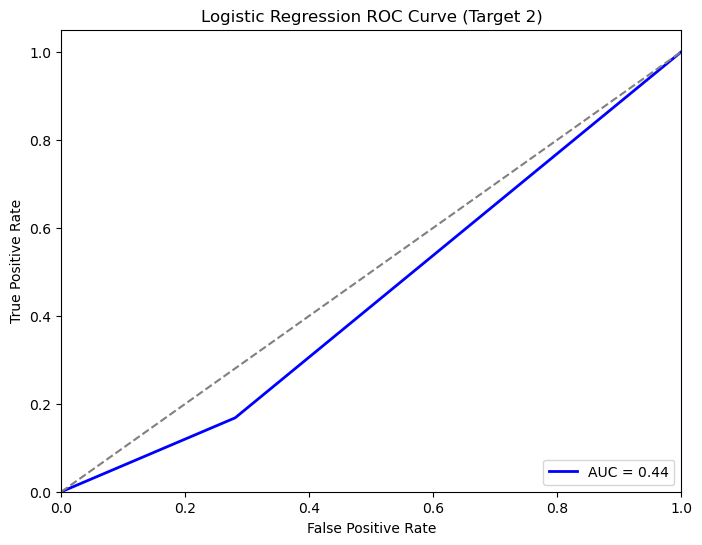

Logistic Regression F1 Score for target_column_1: 0.5807712794686791
Logistic Regression F1 Score for target_column_2: 0.5062928729960043


In [84]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# ===========================
# Evaluate all models (for KNN, Decision Tree, Random Forest, Logistic Regression, MLP)

# 1. KNN
y_pred_knn = best_knn.predict(X_test_scaled)
y_pred_knn_prob = best_knn.predict_proba(X_test_scaled)

# Confusion Matrix for KNN (for target_column_1)
cm_knn_1 = confusion_matrix(y_test.iloc[:, 0], y_pred_knn[:, 0])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('KNN Confusion Matrix (Target 1)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for KNN (for target_column_2)
cm_knn_2 = confusion_matrix(y_test.iloc[:, 1], y_pred_knn[:, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('KNN Confusion Matrix (Target 2)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# F1 Score for KNN
f1_knn_1 = f1_score(y_test.iloc[:, 0], y_pred_knn[:, 0], average='weighted')
f1_knn_2 = f1_score(y_test.iloc[:, 1], y_pred_knn[:, 1], average='weighted')
print(f"KNN F1 Score for target_column_1: {f1_knn_1}")
print(f"KNN F1 Score for target_column_2: {f1_knn_2}")

# ====================
# 2. Decision Tree
y_pred_dt = best_dt.predict(X_test_scaled)
y_pred_dt_prob = best_dt.predict_proba(X_test_scaled)

# Confusion Matrix for Decision Tree (for target_column_1)
cm_dt_1 = confusion_matrix(y_test.iloc[:, 0], y_pred_dt[:, 0])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Decision Tree Confusion Matrix (Target 1)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Decision Tree (for target_column_2)
cm_dt_2 = confusion_matrix(y_test.iloc[:, 1], y_pred_dt[:, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Decision Tree Confusion Matrix (Target 2)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



# F1 Score for Decision Tree
f1_dt_1 = f1_score(y_test.iloc[:, 0], y_pred_dt[:, 0], average='weighted')
f1_dt_2 = f1_score(y_test.iloc[:, 1], y_pred_dt[:, 1], average='weighted')
print(f"Decision Tree F1 Score for target_column_1: {f1_dt_1}")
print(f"Decision Tree F1 Score for target_column_2: {f1_dt_2}")

# ====================
# 3. Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_rf_prob = best_rf.predict_proba(X_test_scaled)

# Confusion Matrix for Random Forest (for target_column_1)
cm_rf_1 = confusion_matrix(y_test.iloc[:, 0], y_pred_rf[:, 0])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Random Forest Confusion Matrix (Target 1)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Random Forest (for target_column_2)
cm_rf_2 = confusion_matrix(y_test.iloc[:, 1], y_pred_rf[:, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Random Forest Confusion Matrix (Target 2)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# F1 Score for Random Forest
f1_rf_1 = f1_score(y_test.iloc[:, 0], y_pred_rf[:, 0], average='weighted')
f1_rf_2 = f1_score(y_test.iloc[:, 1], y_pred_rf[:, 1], average='weighted')
print(f"Random Forest F1 Score for target_column_1: {f1_rf_1}")
print(f"Random Forest F1 Score for target_column_2: {f1_rf_2}")

# ====================
# 4. Logistic Regression
y_pred_logreg = best_logreg.predict(X_test_scaled)

# Confusion Matrix for Logistic Regression (for target_column_1)
cm_logreg_1 = confusion_matrix(y_test.iloc[:, 0], y_pred_logreg[:, 0])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Logistic Regression Confusion Matrix (Target 1)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Logistic Regression (for target_column_2)
cm_logreg_2 = confusion_matrix(y_test.iloc[:, 1], y_pred_logreg[:, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Logistic Regression Confusion Matrix (Target 2)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Logistic Regression (for target_column_1)
fpr_logreg_1, tpr_logreg_1, _ = roc_curve(y_test.iloc[:, 0], y_pred_logreg[:, 0])
roc_auc_logreg_1 = auc(fpr_logreg_1, tpr_logreg_1)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg_1, tpr_logreg_1, color='blue', lw=2, label=f'AUC = {roc_auc_logreg_1:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve (Target 1)')
plt.legend(loc='lower right')
plt.show()

# ROC Curve for Logistic Regression (for target_column_2)
fpr_logreg_2, tpr_logreg_2, _ = roc_curve(y_test.iloc[:, 1], y_pred_logreg[:, 1])
roc_auc_logreg_2 = auc(fpr_logreg_2, tpr_logreg_2)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg_2, tpr_logreg_2, color='blue', lw=2, label=f'AUC = {roc_auc_logreg_2:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve (Target 2)')
plt.legend(loc='lower right')
plt.show()

# F1 Score for Logistic Regression
f1_logreg_1 = f1_score(y_test.iloc[:, 0], y_pred_logreg[:, 0], average='weighted')
f1_logreg_2 = f1_score(y_test.iloc[:, 1], y_pred_logreg[:, 1], average='weighted')
print(f"Logistic Regression F1 Score for target_column_1: {f1_logreg_1}")
print(f"Logistic Regression F1 Score for target_column_2: {f1_logreg_2}")



In [1]:
from sklearn.metrics import classification_report

# ===========================
# Evaluate all models (for KNN, Decision Tree, Random Forest, Logistic Regression, MLP)

# 1. KNN
y_pred_knn = best_knn.predict(X_test_scaled)

# Classification Report for KNN
print("KNN Classification Report (Target 1):")
print(classification_report(y_test.iloc[:, 0], y_pred_knn[:, 0]))

print("KNN Classification Report (Target 2):")
print(classification_report(y_test.iloc[:, 1], y_pred_knn[:, 1]))

# ====================
# 2. Decision Tree
y_pred_dt = best_dt.predict(X_test_scaled)

# Classification Report for Decision Tree
print("Decision Tree Classification Report (Target 1):")
print(classification_report(y_test.iloc[:, 0], y_pred_dt[:, 0]))

print("Decision Tree Classification Report (Target 2):")
print(classification_report(y_test.iloc[:, 1], y_pred_dt[:, 1]))

# ====================
# 3. Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)

# Classification Report for Random Forest
print("Random Forest Classification Report (Target 1):")
print(classification_report(y_test.iloc[:, 0], y_pred_rf[:, 0]))

print("Random Forest Classification Report (Target 2):")
print(classification_report(y_test.iloc[:, 1], y_pred_rf[:, 1]))

# ====================
# 4. Logistic Regression
y_pred_logreg = best_logreg.predict(X_test_scaled)

# Classification Report for Logistic Regression
print("Logistic Regression Classification Report (Target 1):")
print(classification_report(y_test.iloc[:, 0], y_pred_logreg[:, 0]))

print("Logistic Regression Classification Report (Target 2):")
print(classification_report(y_test.iloc[:, 1], y_pred_logreg[:, 1]))



NameError: name 'best_knn' is not defined